<a href="https://colab.research.google.com/github/prasanth5reddy/D2L/blob/master/Multilayer%20Perceptrons/model_selection_underfitting_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab/D2L.AI/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing Libraries

In [2]:
!pip install mxnet

Importing Libraries

In [0]:
%matplotlib inline
import d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

Polynomial Regression

In [0]:
maxdegree = 20
n_train, n_test = 100, 100
true_w = nd.zeros(maxdegree)
true_w[:4] = nd.array([5, 1.2, -3.4, 5.6])

features = nd.random.normal(shape=(n_train + n_test, 1))
features = nd.random.shuffle(features)
poly_features = nd.power(features, nd.arange(maxdegree).reshape(1, -1))
poly_features = poly_features / (nd.gamma(nd.arange(maxdegree) + 1).reshape(1, -1))
labels = nd.dot(poly_features, true_w)
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [5]:
features[:2], poly_features[:2], labels[:2]

(
 [[1.5094751]
  [1.9676613]]
 <NDArray 2x1 @cpu(0)>, 
 [[1.0000000e+00 1.5094751e+00 1.1392574e+00 5.7322693e-01 2.1631797e-01
   6.5305315e-02 1.6429458e-02 3.5428370e-03 6.6847802e-04 1.1211676e-04
   1.6923748e-05 2.3223611e-06 2.9212887e-07 3.3920092e-08 3.6572534e-09
   3.6803552e-10 3.4721281e-11 3.0829944e-12 2.5853909e-13 2.0539909e-14]
  [1.0000000e+00 1.9676613e+00 1.9358451e+00 1.2696959e+00 6.2458295e-01
   2.4579351e-01 8.0606394e-02 2.2658013e-02 5.5729118e-03 1.2184002e-03
   2.3973989e-04 4.2884261e-05 7.0318088e-06 1.0643244e-06 1.4958786e-07
   1.9622549e-08 2.4131583e-09 2.7931044e-10 3.0532687e-11 3.1619989e-12]]
 <NDArray 2x20 @cpu(0)>, 
 [6.151217  7.8766146]
 <NDArray 2 @cpu(0)>)

Defining, Training and Testing Model

In [0]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
  d2l.set_figsize(figsize)
  d2l.plt.xlabel(x_label)
  d2l.plt.ylabel(y_label)
  d2l.plt.semilogy(x_vals, y_vals)
  if x2_vals and y2_vals:
    d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
    d2l.plt.legend(legend)

In [0]:
num_epochs, loss = 200, gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
  net = nn.Sequential()
  net.add(nn.Dense(1, use_bias=False))
  net.initialize()
  batch_size = min(10, train_labels.shape[0])
  train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
  trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})
  train_ls, test_ls = [], []
  for _ in range(num_epochs):
    for X, y in train_iter:
      with autograd.record():
        l = loss(net(X), y)
      l.backward()
      trainer.step(batch_size)
    train_ls.append(loss(net(train_features), train_labels).mean().asscalar())
    test_ls.append(loss(net(test_features), test_labels).mean().asscalar())
  print('final epoch : train loss', train_ls[-1], 'test loss', test_ls[-1])
  semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])
  print('weight:', net[0].weight.data().asnumpy())

Third-order Polynomial Function Fitting (Normal)

final epoch : train loss 3.9818944e-05 test loss 3.8862498e-05
weight: [[ 5.001614   1.1976167 -3.4018593  5.6042   ]]


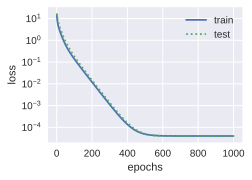

In [8]:
num_epochs = 1000

fit_and_plot(poly_features[:n_train, 0:4], poly_features[n_train:, 0:4], labels[:n_train], labels[n_train:])

Linear Function Fitting (Underfitting)

final epoch : train loss 2.5033126 test loss 2.9887495
weight: [[ 4.8770037  4.119323  -2.3586888]]


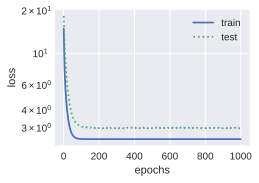

In [9]:
num_epochs = 1000

fit_and_plot(poly_features[:n_train, 0:3], poly_features[n_train:, 0:3], labels[:n_train], labels[n_train:])

Insufficient Training (Overfitting)

final epoch : train loss 0.0026279462 test loss 0.0068233507
weight: [[ 4.9685745   1.3221681  -3.2409492   5.011543   -0.38567016  1.5795484
   0.04282336  0.22298884 -0.03185485  0.03324599 -0.01788209  0.01419548
   0.00741164  0.01047162 -0.06528615  0.02145068  0.06565462  0.02129446
  -0.02506039 -0.00960142]]


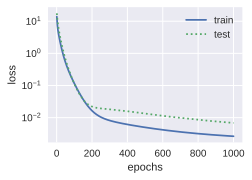

In [10]:
num_epochs = 1000
n_subset = 100  # Subset of data to train on
n_degree = 20   # Degree of polynomials

fit_and_plot(poly_features[:n_subset, 0:n_degree], poly_features[n_train:, 0:n_degree], labels[:n_subset], labels[n_train:])